<a href="https://colab.research.google.com/github/Park-SungUk/AI-for-deeplearning/blob/main/Week6/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [48]:
#MNIST 데이터 가져옴
from tensorflow.keras.datasets import mnist 
import numpy as np
#데이터 전처리
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
#train_image + noise(random 이용)
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
#train_image + zero (0붙임)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [50]:
from tensorflow import keras
from tensorflow.keras import layers

#모델 만들기
def get_model(): 
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model
#histroy_original 데이터훈련
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2) #validation : 20%
#history_noise : noise 데이터로 훈련
model = get_model() 
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2) #validation : 20%
#history_zero : zero 데이터로 훈련련
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.2961 - accuracy: 0.9150 - val_loss: 0.1524 - val_accuracy: 0.9574
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1222 - accuracy: 0.9637 - val_loss: 0.1117 - val_accuracy: 0.9663
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0803 - accuracy: 0.9759 - val_loss: 0.1002 - val_accuracy: 0.9703
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0576 - accuracy: 0.9828 - val_loss: 0.0824 - val_accuracy: 0.9764
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0430 - accuracy: 0.9874 - val_loss: 0.0860 - val_accuracy: 0.9750
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0326 - accuracy: 0.9907 - val_loss: 0.0789 - val_accuracy: 0.9776
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0250 - accuracy: 0.9929 - val_loss: 0.0782 - val_accuracy: 0.9775
Epoch 

**Plotting a validation accuracy comparison**

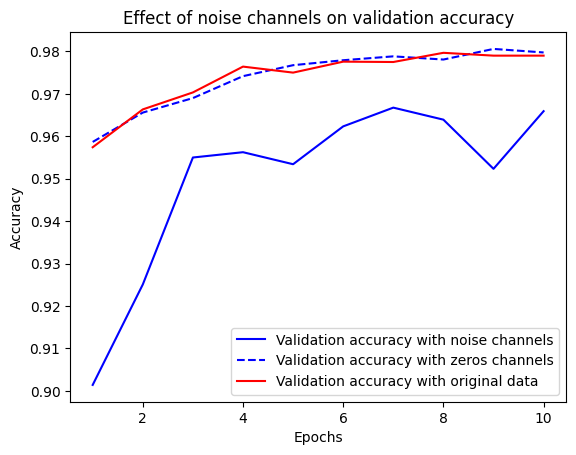

In [51]:
import matplotlib.pyplot as plt
#validation 정확도 비교
val_acc_original = history_original.history["val_accuracy"]
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r-",
         label="Validation accuracy with original data")

plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [55]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
#데이터 섞은후 다시 훈련
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)
#모델 만들고->컴파일->훈련
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model_history = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 2.3151 - accuracy: 0.1015 - val_loss: 2.3052 - val_accuracy: 0.1054
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2992 - accuracy: 0.1158 - val_loss: 2.3098 - val_accuracy: 0.1056
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2911 - accuracy: 0.1245 - val_loss: 2.3187 - val_accuracy: 0.1053
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2794 - accuracy: 0.1411 - val_loss: 2.3243 - val_accuracy: 0.0986
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2636 - accuracy: 0.1496 - val_loss: 2.3399 - val_accuracy: 0.0981
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2449 - accuracy: 0.1645 - val_loss: 2.3521 - val_accuracy: 0.1007
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2216 - accuracy: 0.1796 - val_loss: 2.3607 - val_accuracy: 0.1018

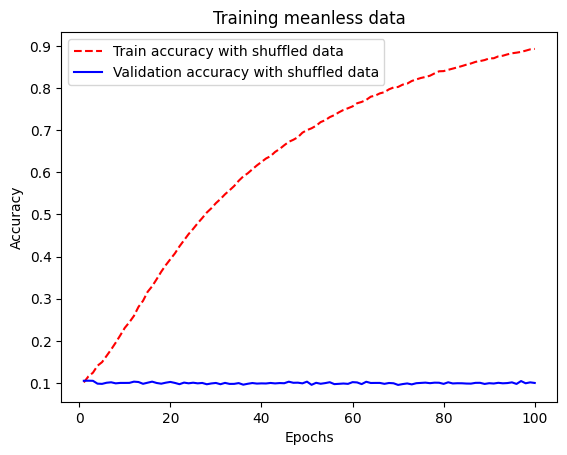

In [57]:
#### 준비
import matplotlib.pyplot as plt
val_acc_shuffle = model_history.history["val_accuracy"]
train_acc_shuffle = model_history.history["accuracy"]
epochs = range(1, 101) #1부터 100까지는 1,101임. history epoch하고 동일하게 되어야함.
plt.plot(epochs, train_acc_shuffle, "r--",
         label="Train accuracy with shuffled data")
plt.plot(epochs, val_acc_shuffle, "b-",
         label="Validation accuracy with shuffled data")

plt.title("Training meanless data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# 질문 : The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
#rmsprop(a.) - a:learning rate
#높은 학습률 적용 모델델
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 798.3196 - accuracy: 0.3000 - val_loss: 4.1683 - val_accuracy: 0.1548
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7491 - accuracy: 0.2046 - val_loss: 2.1247 - val_accuracy: 0.1989
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5757 - accuracy: 0.2087 - val_loss: 2.1684 - val_accuracy: 0.2178
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7052 - accuracy: 0.2299 - val_loss: 2.2219 - val_accuracy: 0.1955
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 2.4830 - accuracy: 0.2200 - val_loss: 2.1343 - val_accuracy: 0.1955
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2967 - accuracy: 0.1932 - val_loss: 2.2365 - val_accuracy: 0.2299
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5503 - accuracy: 0.2043 - val_loss: 2.2410 - val_accuracy: 0.1722
Epoc

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
#학습률 0.01 이용용
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3672 - accuracy: 0.9125 - val_loss: 0.1605 - val_accuracy: 0.9540
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1271 - accuracy: 0.9644 - val_loss: 0.1309 - val_accuracy: 0.9683
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0928 - accuracy: 0.9746 - val_loss: 0.1456 - val_accuracy: 0.9627
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0834 - accuracy: 0.9792 - val_loss: 0.1900 - val_accuracy: 0.9663
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0704 - accuracy: 0.9825 - val_loss: 0.1495 - val_accuracy: 0.9722
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0611 - accuracy: 0.9849 - val_loss: 0.1650 - val_accuracy: 0.9728
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0528 - accuracy: 0.9873 - val_loss: 0.1827 - val_accuracy: 0.9723
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
#모델 레이어 1개 == simple logistic regression (underfit)
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6505 - accuracy: 0.8439 - val_loss: 0.3616 - val_accuracy: 0.9026
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3532 - accuracy: 0.9035 - val_loss: 0.3104 - val_accuracy: 0.9137
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3186 - accuracy: 0.9116 - val_loss: 0.2938 - val_accuracy: 0.9193
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3024 - accuracy: 0.9153 - val_loss: 0.2845 - val_accuracy: 0.9202
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2925 - accuracy: 0.9186 - val_loss: 0.2794 - val_accuracy: 0.9231
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2858 - accuracy: 0.9205 - val_loss: 0.2764 - val_accuracy: 0.9235
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2811 - accuracy: 0.9215 - val_loss: 0.2717 - val_accuracy: 0.9257
Epoch 

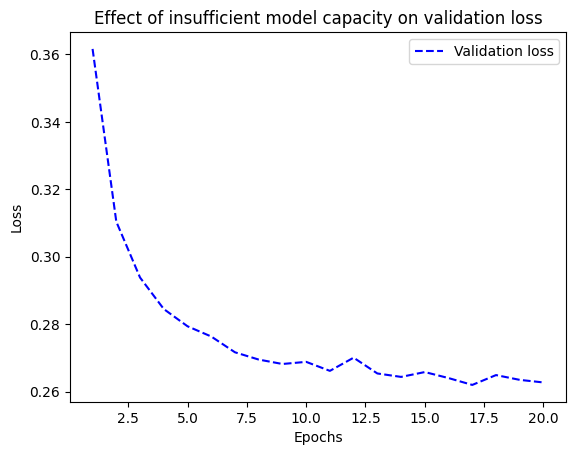

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
#underfit -> overfit
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3665 - accuracy: 0.8961 - val_loss: 0.1776 - val_accuracy: 0.9483
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1590 - accuracy: 0.9523 - val_loss: 0.1308 - val_accuracy: 0.9622
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1119 - accuracy: 0.9664 - val_loss: 0.1265 - val_accuracy: 0.9627
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0874 - accuracy: 0.9738 - val_loss: 0.1097 - val_accuracy: 0.9684
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0723 - accuracy: 0.9778 - val_loss: 0.1016 - val_accuracy: 0.9703
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0596 - accuracy: 0.9822 - val_loss: 0.1065 - val_accuracy: 0.9703
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.1310 - val_accuracy: 0.9643
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
#imdb 데이터셋 이용
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

#vectorize_sequence
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 1s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 59ms/step - loss: 0.5493 - accuracy: 0.7617 - val_loss: 0.4161 - val_accuracy: 0.8641
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3439 - accuracy: 0.8908 - val_loss: 0.3766 - val_accuracy: 0.8409
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2571 - accuracy: 0.9153 - val_loss: 0.2867 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2035 - accuracy: 0.9317 - val_loss: 0.2754 - val_accuracy: 0.8912
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1724 - accuracy: 0.9421 - val_loss: 0.2975 - val_accuracy: 0.8823
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1442 - accuracy: 0.9547 - val_loss: 0.2813 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1262 - accurac

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 5s 126ms/step - loss: 0.6232 - accuracy: 0.6465 - val_loss: 0.5695 - val_accuracy: 0.7959
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5253 - accuracy: 0.7815 - val_loss: 0.5283 - val_accuracy: 0.8595
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.4776 - accuracy: 0.8485 - val_loss: 0.4989 - val_accuracy: 0.8710
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4448 - accuracy: 0.8842 - val_loss: 0.4785 - val_accuracy: 0.8639
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4186 - accuracy: 0.9083 - val_loss: 0.4726 - val_accuracy: 0.8549
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3969 - accuracy: 0.9229 - val_loss: 0.4611 - val_accuracy: 0.8722
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3779 - accuracy: 0.9377 - val_loss: 0.4634 - val_accuracy: 0.8656
Epoch 8/20
3

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.5754 - accuracy: 0.6969 - val_loss: 0.4177 - val_accuracy: 0.8147
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3298 - accuracy: 0.8619 - val_loss: 0.2977 - val_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2350 - accuracy: 0.9094 - val_loss: 0.3249 - val_accuracy: 0.8610
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1808 - accuracy: 0.9301 - val_loss: 0.4536 - val_accuracy: 0.8223
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1447 - accuracy: 0.9454 - val_loss: 0.3231 - val_accuracy: 0.8840
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1181 - accuracy: 0.9568 - val_loss: 0.2966 - val_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0668 - accuracy: 0.9791 - val_loss: 0.4005 - val_accuracy: 0.8780
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
#L2규제 (regularizers.l2 부분)
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.6452 - accuracy: 0.7753 - val_loss: 0.5164 - val_accuracy: 0.8552
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4448 - accuracy: 0.8796 - val_loss: 0.4145 - val_accuracy: 0.8795
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3591 - accuracy: 0.9034 - val_loss: 0.4030 - val_accuracy: 0.8675
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3158 - accuracy: 0.9175 - val_loss: 0.3790 - val_accuracy: 0.8755
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2920 - accuracy: 0.9258 - val_loss: 0.3581 - val_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2739 - accuracy: 0.9335 - val_loss: 0.3564 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2604 - accuracy: 0.9398 - val_loss: 0.3592 - val_accuracy: 0.8850
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.6345 - accuracy: 0.6307 - val_loss: 0.5257 - val_accuracy: 0.8476
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5104 - accuracy: 0.7725 - val_loss: 0.4133 - val_accuracy: 0.8733
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4365 - accuracy: 0.8307 - val_loss: 0.3525 - val_accuracy: 0.8825
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3741 - accuracy: 0.8671 - val_loss: 0.3149 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3315 - accuracy: 0.8875 - val_loss: 0.2971 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2937 - accuracy: 0.9046 - val_loss: 0.2808 - val_accuracy: 0.8886
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2603 - accuracy: 0.9156 - val_loss: 0.2808 - val_accuracy: 0.8920
Epoch 8/20
30

## Summary